In [567]:
## Importing Libraries ##
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn.model_selection import cross_val_score

In [568]:
## Loading Dataset ##
digits = datasets.load_digits()
gapminder = pd.read_csv('gapminder.csv')
credit = pd.read_csv('creditcard.csv.crdownload')

In [569]:
## Function Declaration ##
x = digits.data
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
kClassifier = KNeighborsClassifier(n_neighbors=3)

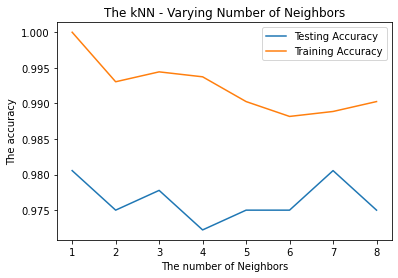

In [570]:
## Creating value to store 1 to 9 neighbor values ##
neighborsNumber = np.arange(1, 9)

## Creating empty arrays to store ## 
testAcc = np.empty(len(neighborsNumber))
trainAcc = np.empty(len(neighborsNumber))

## The Looping over values of p ##
for i, p in enumerate(neighborsNumber):
    
    ## Creation of a k-NN Classifier ##
    kClassifier = KNeighborsClassifier(n_neighbors=p)

    ## Fit the classifier to the training data ## 
    kClassifier.fit(X_train, y_train)
        
    ## Compute accuracy on the testing set ##
    testAcc[i] = kClassifier.score(X_test, y_test)

    ## Competing accuracy on tests ##
    trainAcc[i] = kClassifier.score(X_train, y_train)
    
## Generating X and Y label ##
plt.ylabel('The accuracy')
plt.xlabel('The number of Neighbors')

## Generating title ##
plt.title('The kNN - Varying Number of Neighbors')

## Ploting of charts ## 
plt.plot(neighborsNumber, testAcc, label = 'Testing Accuracy')
plt.plot(neighborsNumber, trainAcc, label = 'Training Accuracy')

## Creating legend ## 
plt.legend()

## Showing the results ## 
plt.show()

In [571]:
## Loading Mnist data ## 
mnist = datasets.load_digits()

## Creating SVM ## 
SVM = svm.SVC(C=1.0,cache_size=200,class_weight=None,coef0=0.0,decision_function_shape='ovr',gamma='auto',degree=3,kernel='linear',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)

## Reshaping structure to accomdate required format ##
samples, x, y = mnist.images.shape
mnistTrained = mnist.images.reshape((samples,x*y))

## Training SVM ## 
X_train, X_test, y_train, y_test = train_test_split(mnistTrained, mnist.target, test_size=0.5, shuffle=False)

## Fiting SVM ## 
SVM.fit(X_train, y_train)

## PredictingResults ## 
SVMpredicted = SVM.predict(X_test)

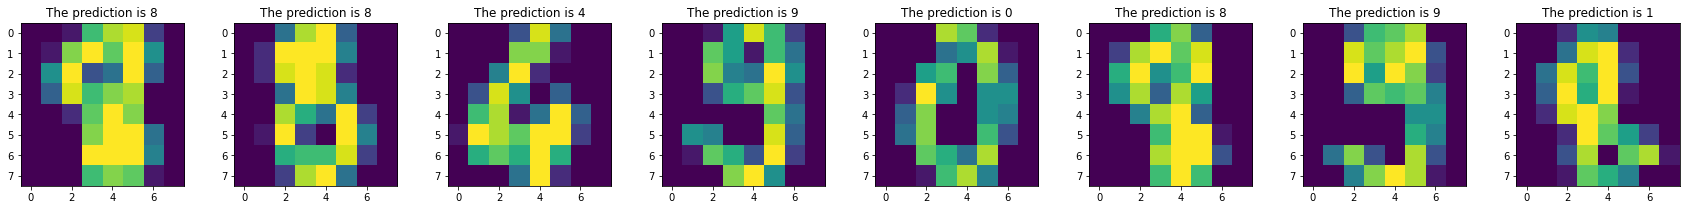

In [572]:
## Designing subplots ## 
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(30, 3))

## For loop ##
for ax, digit, SVMprediction in zip(axes, X_test, SVMpredicted):
    
   ## Concert image ##
    SVMresults = digit.reshape(8, 8)
    
   ## Show prediction results ## 
    ax.imshow(SVMresults)
    ax.set_title("The prediction is " + f"{SVMprediction}")

In [573]:
## Creating classification report ##
Report = metrics.classification_report(y_test, predicted)

## Printing the results ##
print("The SVM classification report/results for digits " + f"{SVM}" + "\n" + f"{Report}\n")



The SVM classification report/results for digits SVC(gamma='auto', kernel='linear')
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.87      0.93      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899




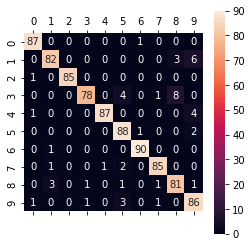

In [574]:
## Creating confusion matrix ## 
confusion_matrix = confusion_matrix(y_test, SVMpredicted)

## Ploting Confusion Matrix ##
plt.matshow(confusion_matrix)
sn.heatmap(confusion_matrix,annot=True)

<BarContainer object of 3 artists>

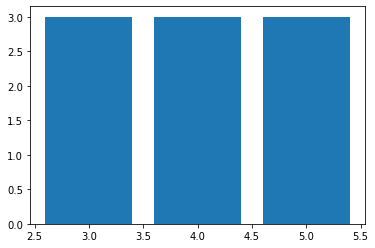

In [486]:
## Ploting Plot ## 

plt.bar([5,4,3],3)

<AxesSubplot:>

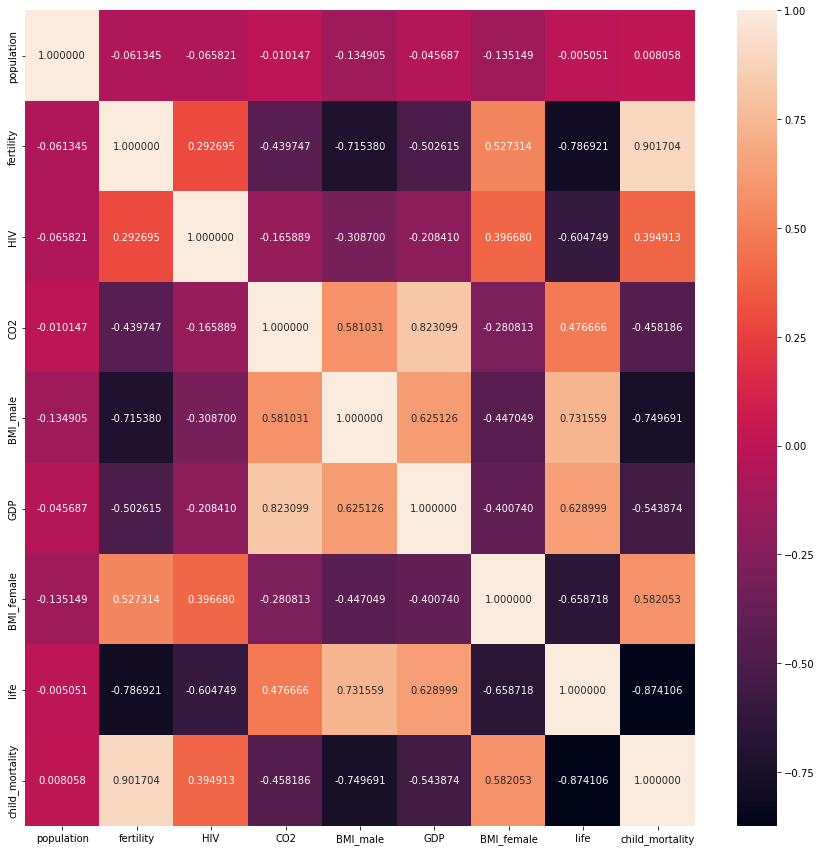

In [575]:
## Visalising Gaminder data in Heatmap format ##

plt.figure(figsize=(15, 15))
sn.heatmap(gapminder.corr(),annot=True, fmt="f")

<AxesSubplot:xlabel='fertility', ylabel='life'>

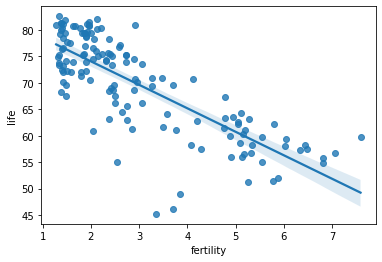

In [576]:
## Plotting Linear Regression ##
sn.regplot(x="fertility", y="life", data=gapminder)

In [577]:
## Defining fraud results ##
frauds = credit.loc[credit['Class']== 1]
non_frauds = credit.loc[credit['Class'] == 0]

## Printing amount ## 
print(len(frauds),'Frauds',len(non_frauds),"nonfrauds")

377 Frauds 191762 nonfrauds


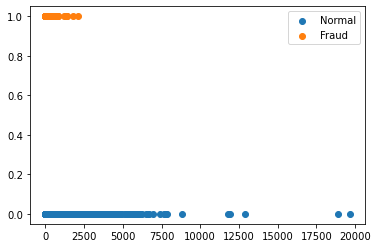

In [578]:
## Creating graph data ## 
plt.scatter(credit['Amount'][credit['Class']== 0], credit['Class'][credit['Class']== 0],marker='o')
plt.scatter(credit['Amount'][credit['Class']== 1], credit['Class'][credit['Class']== 1],marker='o')

## Creating legend ## 
plt.legend(['Normal','Fraud'])

In [579]:
## Defining logisticRegression ##
lr = LogisticRegression()

## Removing Na in credit ##
credit = credit.dropna()

In [580]:
## Defining creditData ## 
creditData = credit['Amount'].values
label = credit.Class.values

## Reshaping format ## 
creditData = creditData.reshape(-1, 1)


In [581]:
## Splting data into test and train models ##
X_train, X_test, y_train, y_test = train_test_split(creditData, label,test_size=0.5)

## Fiting data ## 
lr.fit(X_test,y_test)


LogisticRegression()

In [582]:
## Lr.score results ##
lr.score(X_test,y_test)

0.9979806391173103

In [583]:
lr.decision_function(-X_test)

array([-6.23978776, -6.22700504, -6.21943382, ..., -6.22160554,
       -6.25248643, -6.22103243])

In [584]:
## Credit prediction results ##
lr.predict_proba(X_train)

array([[0.99799052, 0.00200948],
       [0.9978812 , 0.0021188 ],
       [0.99800136, 0.00199864],
       ...,
       [0.99800676, 0.00199324],
       [0.99800966, 0.00199034],
       [0.99796427, 0.00203573]])

In [585]:
## Predictionresults ## 
predictedLR = lr.predict(X_test)

In [589]:
## Declaring llreport variable ## 
lrReport = metrics.classification_report(y_test, predictedLR)

## Printing Results ## 
print("The LR report/results for Fraud and non Fraud " + f"{lr}" + "\n" + f"{lrReport}\n")



The LR report/results for Fraud and non Fraud LogisticRegression()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     95876
         1.0       0.00      0.00      0.00       194

    accuracy                           1.00     96070
   macro avg       0.50      0.50      0.50     96070
weighted avg       1.00      1.00      1.00     96070




C:\Users\matty enright\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matty enright\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matty enright\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
